In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring Risk and Volatility in the Cryptocurrency Market

## Introduction

2017 was a banner year for cryptocurrencies. Bitcoin peaked at just under \$20,000 USD, which was quite the run up considering at the begining of the year it was only trading at just over $1000 USD. Leading up to that tremdous high, all anyone could talk about was trading cryptocurrencies, everyone was making fortunes trading Bitcoin and other cryptocurrencies seemingly no one had even heard of. But who could have thought that we would see Bitcoin lose nearly 80% in 2018? Perhaps we didn't understand this new market or we couldn't predict the risk of a possible sell-off. Is it possible to understand the volatility of the cyrptocurrencies market using traditional measures of volatility? Can we analyze the risk of cryptocurrencies the same way we could analyze the risk of a convential financial security? Let's take a look at the data!

### Data:
We're going to load up an API from coinmarketcap.com. It contains data for 100 cryptocurrencies currently trading in the market. The data includes name, price, market capitalization, and the 1 hour, 1 day, and 7 day return, all of which will be immensley useful in understanding the behavior of these financial instruments. 

We're going to assume that this data is representative of the overall cryptocurrency market.

In [2]:
# Load https://api.coinmarketcap.com/v1/ticker/?limit=0 and store as a DataFrame
path = 'https://api.coinmarketcap.com/v1/ticker/?limit=0'
api = pd.read_json(path)
#api.to_csv("coinmarket_api.csv", index=False)

api.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,5.260337e+09,17464950,bitcoin,1546710744,67620148505,2.100000e+07,Bitcoin,0.04,1.94,-1.09,1.000000,3871.763074,1,BTC,17464950
1,3.433390e+09,104210825,ethereum,1546710739,16428397676,NaN,Ethereum,0.35,5.39,13.87,0.040734,157.645788,2,ETH,104210825
2,4.527806e+08,40794121066,ripple,1546710723,14619361691,1.000000e+11,XRP,-0.01,1.15,-4.02,0.000093,0.358369,3,XRP,99991738974
3,2.354147e+08,17550188,bitcoin-cash,1546710732,2858412449,2.100000e+07,Bitcoin Cash,0.18,2.63,-2.93,0.042084,162.870764,4,BCH,17550188
4,7.557864e+08,906245118,eos,1546710731,2485986807,NaN,EOS,0.37,2.35,2.66,0.000709,2.743173,5,EOS,1006245120


In [3]:
# Save the API data to a csv file so we can work with a specific data set
df = pd.read_csv('coinmarket_api.csv')

df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,4.933838e+09,17453237,bitcoin,1546194561,67520811077,2.100000e+07,Bitcoin,0.03,-0.58,-3.64,1.000000,3868.669810,1,BTC,17453237
1,5.287510e+08,40794121066,ripple,1546194542,14963327244,1.000000e+11,XRP,0.03,-0.92,-1.03,0.000095,0.366801,2,XRP,99991738974
2,2.915749e+09,104100478,ethereum,1546194560,14429233936,NaN,Ethereum,0.12,1.97,6.80,0.035810,138.608719,3,ETH,104100478
3,2.858038e+08,17539163,bitcoin-cash,1546194554,2867597314,2.100000e+07,Bitcoin Cash,0.33,-1.39,-17.98,0.042240,163.496821,4,BCH,17539163
4,7.454101e+08,906245118,eos,1546194554,2399308781,NaN,EOS,-0.66,0.54,-6.28,0.000684,2.647527,5,EOS,1006245120


## Visualizing the Market

### Analytic Question 1:

__ How is the market comprised?  What is the largest cryptocurrency?  What is the typical price of the cryptocurrency?__

Let's explore the dataset. First, let's look at the top 10 largest cryptocurrencies by market capitalization. Market capitalization is the total dollar market value of a company's outstanding shares. Another way to think of it is price of an asset * supply or the "size" of a company.

In [4]:
# Select the columns id and market_cap_usd
market_cap_df = df.loc[:,['id','market_cap_usd']]

# Drop any cryptos with a market cap of zero
market_cap_df = market_cap_df.query('market_cap_usd > 0')

# Set index as the 'id' column, this will help with visualization later
market_cap_df = market_cap_df.set_index('id')

market_cap_df.head()

,market_cap_usd
id,
bitcoin,67520811077
ripple,14963327244
ethereum,14429233936
bitcoin-cash,2867597314
eos,2399308781


Some of these names look familiar, as we can expect with the top cryptocurrencies in the market, but billions and billions of dollars can be hard to put in perspective. Let's take a look at the big picture.

In [5]:
# First let's find the market capitalization of each coin as a percentage
market_cap_df = market_cap_df.assign(market_cap_perc =
    lambda x: (x.market_cap_usd / market_cap_df.market_cap_usd.sum()) * 100)

market_cap_df.head()

,market_cap_usd,market_cap_perc
id,,
bitcoin,67520811077,53.773453
ripple,14963327244,11.916767
ethereum,14429233936,11.491416
bitcoin-cash,2867597314,2.283749
eos,2399308781,1.910805


Now we can clearly see that the market capitalization of Bitcoin is over 50% of the total cryptocurrency market.

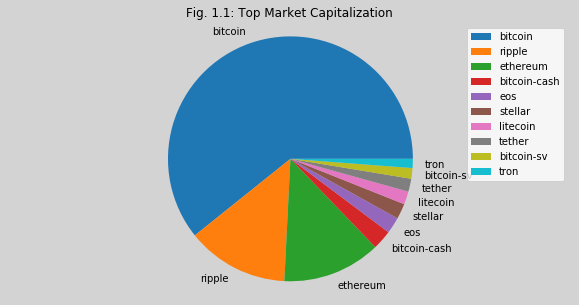

In [6]:
# Let's look at the top 10 cryptocurrencies

plt.figure(figsize=(10, 5), facecolor='lightgrey')

xy = market_cap_df['market_cap_usd'].head(10).plot.pie(title='Fig. 1.1: Top Market Capitalization', cmap='tab10')
plt.axis('equal')
plt.legend(df['id'])
xy.set_ylabel('') # ylabel is not very informative

plt.show()

Not only does Bitcoin dominate over half the cryptocurrency market, but no other coin even comes close to it in size.

Now let's take a look at some price data. Can we spot any trends or patterns?

In [7]:
# Select the columns id, price_btc, and price_usd and assign to price_df
price_df = df.loc[:,['id','price_btc', 'price_usd']]

# Sort the price data in descending order
price_df = price_df.sort_values('price_usd', ascending=False)

price_df.head()

,id,price_btc,price_usd
0,bitcoin,1.000000,3868.669810
18,maker,0.121459,470.125495
3,bitcoin-cash,0.042240,163.496821
2,ethereum,0.035810,138.608719
8,bitcoin-sv,0.022960,88.870708


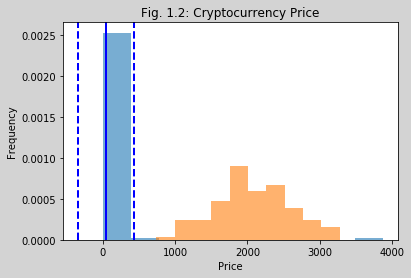

In [8]:
pop1 = np.random.normal(2000, 500, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample1.sort()

plt.figure(facecolor='lightgrey')

plt.hist(price_df['price_usd'], bins=10, alpha=0.6, density=True)
plt.hist(sample1, bins=10, alpha=0.6, density=True)

plt.axvline(price_df['price_usd'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].mean() + price_df['price_usd'].std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].mean() - price_df['price_usd'].std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Fig. 1.2: Cryptocurrency Price')

plt.show()

At first, the distribution of cryptocurrency price in blue looks like it must have been plotted incorrectly compared to a normal distribution in orange. All of the data is clumped at one end of the aixs, it's in no way distributed normally and it doesn't tell us much at all about the price of cryptocurrencies.

Let's see if we can find out more by looking at the top and bottom ranges of the price data.

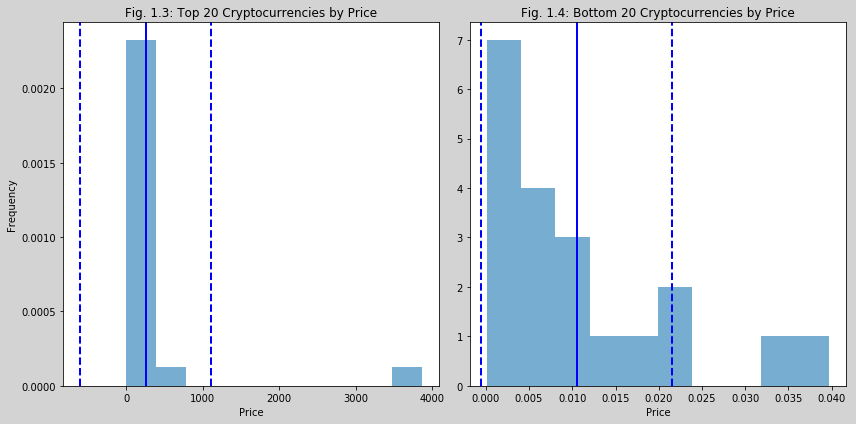

In [9]:
# Set figure size for subplots
plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='lightgrey')

# Plot histogram of top 20 highest price
plt.subplot(1,2,1)

plt.hist(price_df['price_usd'].head(20), bins=10, alpha=0.6, density=True)

plt.axvline(price_df['price_usd'].head(20).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].head(20).mean() + price_df['price_usd'].head(20).std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].head(20).mean() - price_df['price_usd'].head(20).std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Fig. 1.3: Top 20 Cryptocurrencies by Price')

# Plot histogram of bottom 20 lowest price
plt.subplot(1,2,2)

plt.hist(price_df['price_usd'].tail(20), bins=10, alpha=0.6)

plt.axvline(price_df['price_usd'].tail(20).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(price_df['price_usd'].tail(20).mean() + price_df['price_usd'].tail(20).std(),
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(price_df['price_usd'].tail(20).mean() - price_df['price_usd'].tail(20).std(),
            color='b', linestyle='dashed', linewidth=2)

plt.xlabel('Price')
plt.ylabel('')
plt.title('Fig. 1.4: Bottom 20 Cryptocurrencies by Price')

plt.tight_layout()
plt.show()

This is a little more informative, but still not great. Even of the top 20 highest priced cryptocurrencies, the data is clumped at the lower end of the range. It seems like the majority of cryptocurrencies aren't very valuable and the market is dominated by a few high-priced outliers.

Let's look at a scatter plot of the top and bottom of the cryptocurrency market by price.

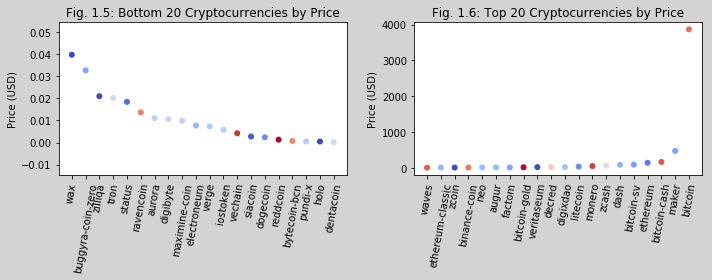

In [25]:
#price_df = price_df.sort_values('price_usd', ascending=True)

plt.subplots(nrows=1, ncols=3, figsize=(10, 4), facecolor='lightgrey')

plt.subplot(1,2,1)

x = price_df.sort_values('price_usd', ascending=False)['id'].tail(20)
y = price_df.sort_values('price_usd', ascending=False)['price_usd'].tail(20)
c = np.random.rand(x.count())**2
xy = plt.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

plt.xlabel('')
plt.xticks(rotation=80)
plt.ylabel('Price (USD)')
#plt.yscale('log')
plt.title('Fig. 1.5: Bottom 20 Cryptocurrencies by Price')

plt.subplot(1,2,2)

x = price_df.sort_values('price_usd', ascending=True)['id'].tail(20)
y = price_df.sort_values('price_usd', ascending=True)['price_usd'].tail(20)
c = np.random.rand(x.count())**1/2

xy = plt.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

plt.xlabel('')
plt.xticks(rotation=80)
plt.ylabel('Price (USD)')
#plt.yscale('log')
plt.title('Fig. 1.6: Top 20 Cryptocurrencies by Price')

plt.tight_layout()
plt.show()

As we expected, most of the prices are in a tight range, and the larger cryptocurrencies--like Bitcoin--are very far out of that range.

Now that we've explored the cryptocurrency market a bit, we've learned that Bitcoin makes over half the market.
Conversely that means that the rest of the market is comprised of many small, low-value coins.
Historically, lower value stocks, such as penny stocks, are known for their high risk-return profile.
In other words, high volatility. This could explain the tumultuous volatility we saw in 2018.

## Modeling Volatility

### Analytic Question 2:

__ How volatile is the cryptocurrency market? Does the composition of the market have an effect on the volatility? __

Let's take a look at volatility and see if we can glean any insights to the cryptocurrency market as a whole.
Luckily, the data contains information of price changes over a 24 hour and 7 day time period.
We can use this to approximate volatility.

In [11]:
# Store the columns 'id', 'percent_change_24h' and 'percent_change_7d' as a DataFrame named volatility
volatility = df.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# set the index to id and drop all NAs
volatility = volatility.set_index('id').dropna()

# sort volatility by percent_change_24h
volatility = volatility.sort_values('percent_change_24h', ascending=True)


volatility.head()

,percent_change_24h,percent_change_7d
id,,
stasis-eurs,-5.62,3.15
revain,-5.47,-3.41
odem,-4.68,-27.32
buggyra-coin-zero,-4.58,-4.46
aurora,-4.35,-11.76


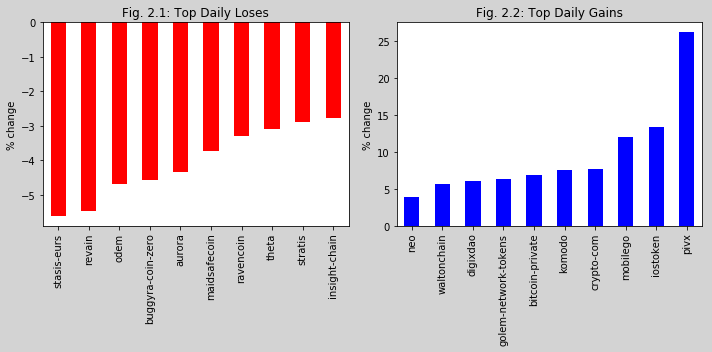

In [12]:
# sort volatility by percent_change_24h
volatility = volatility.sort_values('percent_change_24h', ascending=True)

# set shape of subplots
plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(1,2,1)

volatility.percent_change_24h[:10].plot.bar(color="r")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.1: Top Daily Loses')

# plot top weekly gains
plt.subplot(1,2,2)

volatility.percent_change_24h[-10:].plot.bar(color='b')

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.2: Top Daily Gains')

plt.tight_layout()
plt.show()

Here we can get a sense of the daily volatility of the cryptocurrency market. In Fig. 2.1 we can see that in the biggest daily loses in the cryptocurrency market topped out at -5%, and in Fig. 2.2 we can see that some cryptocurrencies jumped as much as 25% in one day! That's a lot of volatility for such a short time frame. Thankfully, most of it is in the black, not the red. This is just the day-to-day, though, theoretically volatility should smooth out over time. So let's compare this to weekly volatility and see if it's less dramatic than the daily volatility.

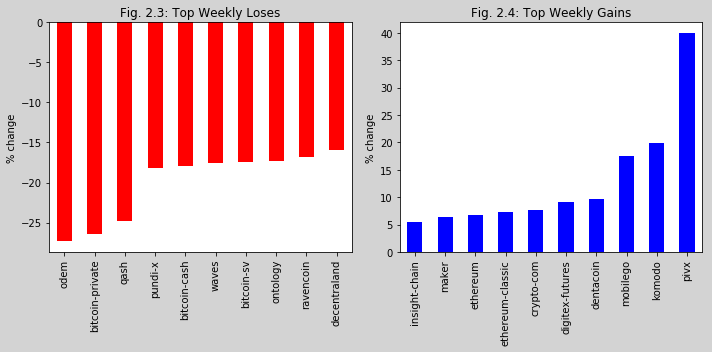

In [13]:
# sort volatility by percent_change_7d
volatility = volatility.sort_values('percent_change_7d', ascending=True)

# set shape of subplots
plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(1,2,1)

volatility.percent_change_7d[:10].plot.bar(color="r")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.3: Top Weekly Loses')

# plot top weekly gains
plt.subplot(1,2,2)

volatility.percent_change_7d[-10:].plot.bar(color='b')

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.4: Top Weekly Gains')

plt.tight_layout()
plt.show()

Woah! The weekly gains and loses are even more dramatic than the day-to-day! The daily loses bottomed out at -%5, but the weekly tanked to as much as -25%. But on a positive note, while the daily gains were capped at 25%, the weekly gains soared as high as 40%.

Turns out the percent change in price over a 24 hour and 7 day period doesn't lend as much insight in the volatility of the cryptocurreny market as we hoped. Perhaps we're looking at an unusual time frame, or perhaps those many, tiny cryptocurrencies we observed earlier are skewing the market? Let's look at a cross section of the cryptocurrency market by market capitalization and see if that clears this up.

We'll use Investopedia's definitions of market capitalization where: 
Large cap: +10 billion 
Mid cap: 2 billion - 10 billion 
Small cap: 300 million - 2 billion 
Micro cap: 50 million - 300 million 
Nano cap: Below 50 million

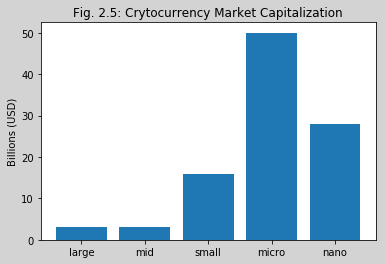

In [14]:
# Let's reload the market_cap_df DataFrame
market_cap_df = df.loc[:,['id','market_cap_usd']]

# create a list of labels
labels = ["large", "mid", "small", "micro", "nano"]

# divide cryptocurrencies by market capitalization
large = market_cap_df.query('market_cap_usd > 10000000000')
large = large.count().id

mid = market_cap_df.query('10000000000 > market_cap_usd > 2000000000')
mid = mid.count().id

small = market_cap_df.query('2000000000 > market_cap_usd > 300000000')
small = small.count().id

micro = market_cap_df.query('300000000 > market_cap_usd > 50000000')
micro = micro.count().id

nano = market_cap_df.query('market_cap_usd < 50000000')
nano = nano.count().id

# create a list of values
values = [large, mid, small, micro, nano]

# plot
plt.figure(facecolor='lightgrey')

plt.bar(range(len(values)), values, tick_label=labels)

plt.title('Fig. 2.5: Crytocurrency Market Capitalization')
plt.ylabel('Billions (USD)')

plt.show()

Just like we saw before, the crypocurrency market is dominated by many very small coins. It's possible that if we limit our analysis to coins with a larger market capitalization, we'll start to see more normal behavior. As financial securities with smaller market capitalization are known for their 'huge gains, crushing losses, and all-around high volatility' according to NASDAQ.

Let's filter the data for just coins that have a market capitalization greater than micro and nano. Ideally, these larger cap coins will behave in manner more similar to traditional financial securities.This limits us to the 22 largest cryptocurrenies by market capitaliation. Let's get analyzing!

First, let's view the volatility of these 'blue chip' cryptocurrencies. Blue chip stocks are 'high-valued, long-term investments' that are 'known for stable earnings' according to Investopedia. We'll see if that's the case with cryptocurrencies.

In [15]:
# query() the df and filter out all the micro and nano-cap cryptocurrencies and save as blue_chip 
blue_chip = df.query('market_cap_usd > 300000000')

In [16]:
# Create a DataFrame that contains volatility information on cryptocurrencies.

# Selecting the id, percent_change_24h and percent_change_7d columns
blue_chip_v = blue_chip.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# Set the index to id and drop all rows that contain NaNs.
blue_chip_v = blue_chip_v.set_index('id').dropna()

#Sort volatility by percent_change_24h in ascending order.
blue_chip_v_24h = blue_chip_v.sort_values('percent_change_24h', ascending=True)

# view the .head() of volatility
blue_chip_v.head()

,percent_change_24h,percent_change_7d
id,,
bitcoin,-0.58,-3.64
ripple,-0.92,-1.03
ethereum,1.97,6.80
bitcoin-cash,-1.39,-17.98
eos,0.54,-6.28


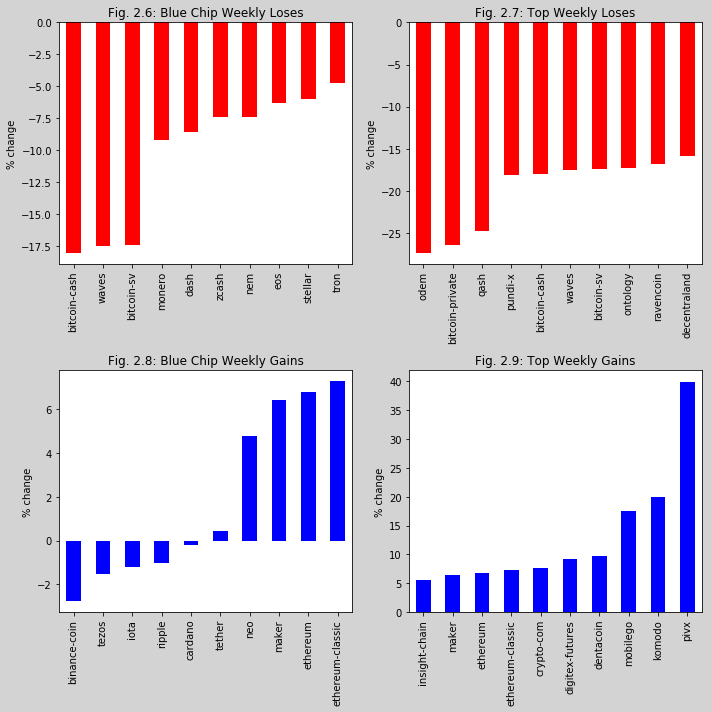

In [17]:
# sort volatility by percent_change_7d
blue_chip_v = blue_chip_v.sort_values('percent_change_7d', ascending=True)

# sort volatility by percent_change_7d
volatility = volatility.sort_values('percent_change_7d', ascending=True)

# set shape of subplots
plt.subplots(nrows=2, ncols=2, figsize=(10, 10), facecolor='lightgrey')

# plot top weekly loses
plt.subplot(2,2,1)

blue_chip_v.percent_change_7d[:10].plot.bar(color="r")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.6: Blue Chip Weekly Loses')

# plot top weekly gains
plt.subplot(2,2,2)

volatility.percent_change_7d[:10].plot.bar(color="r")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.7: Top Weekly Loses')

# plot top weekly loses
plt.subplot(2,2,3)

blue_chip_v.percent_change_7d[-10:].plot.bar(color="b")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.8: Blue Chip Weekly Gains')

# plot top weekly gains
plt.subplot(2,2,4)

volatility.percent_change_7d[-10:].plot.bar(color="b")

plt.ylabel('% change')
plt.xlabel('')
plt.title('Fig. 2.9: Top Weekly Gains')

plt.tight_layout()
plt.show()

Now we can see a clear comparison of the weekly gains/loses of the market vs. our 'blue chip' cryptocurrencies, with the weekly loses charted in red and the weekly gains in blue. The chart shows that the blue chips aren't much safer than any other currency in the market. The blue chip's weekly loses topped out at around -17.5% vs. -25% marketwide, which is less, and that's what we would expect, but it's not less by a significant amount. On the other hand, the weekly gains for the blue chips was eclipsed by the weekly gains of the market. If you invested in the the righty crytocurrency you could have made up to a 40% return, but the best you could have down with one of our blue chips was only 6%. Considering the marginal reducion in risk, the risk-return benefit of the blue chip cryptocurrencies just isn'there.

## Modeling Risk

### Analytic Question 3:

__ Can we model the risk of the cryptocurrency market? Is it possible to reduce the potential risk of trading cryptocurrencies?__
Another measure of risk is beta, which measures risk against the overall market. We can use beta to understand the risk of a specific crytocurrency or group of cryptocurrencies against the risk of the overall cryptocurrency market. We can test the hypothesis that higher-value cryptocurrencies with larger market capitalizations will have a less risky beta, and we can compare that to the beta of the largest cryptocurrency: bitcoin, to lend us some perspective. 

To calculate beta we need three pieces of data: a risk free rate of return, for example a treasury bill or short term government bond, the return of the security we're measuring, and the overall return of the market. 

We'll approximate a risk free rate of return as 2%. To find beta, we find the difference between The return of the cryptocurrency we're measuring and the risk free rate divided by the difference of the overall market return and the risk free rate. 

beta = (asset return - risk free rate) / (market return - risk free rate) 

To understand beta, we can use this easy guide: 
Beta < 1 the asset is less volatile than the market 
Beta > 1 the asset is more volatile than the market 
Beta = 1 the asset is as volatile than the market 
Beta < 0 the asset is depreciating while the market is gaining

In [18]:
# First create a DataFrame
beta_df = df.loc[:, ['id', 'market_cap_usd', 'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd']]

beta_df.head()

,id,market_cap_usd,percent_change_24h,percent_change_7d,price_btc,price_usd
0,bitcoin,67520811077,-0.58,-3.64,1.000000,3868.669810
1,ripple,14963327244,-0.92,-1.03,0.000095,0.366801
2,ethereum,14429233936,1.97,6.80,0.035810,138.608719
3,bitcoin-cash,2867597314,-1.39,-17.98,0.042240,163.496821
4,eos,2399308781,0.54,-6.28,0.000684,2.647527


In [19]:
# Calculate the beta for 24 hours and 7 days
beta_df = beta_df.assign(beta_24h =
    lambda x: ((x.percent_change_24h-2) / (beta_df.percent_change_24h.mean()-2)))

beta_df = beta_df.assign(beta_7d =
    lambda x: ((x.percent_change_7d-2) / (beta_df.percent_change_7d.mean()-2)))

beta_df.head()

,id,market_cap_usd,percent_change_24h,percent_change_7d,price_btc,price_usd,beta_24h,beta_7d
0,bitcoin,67520811077,-0.58,-3.64,1.000000,3868.669810,1.840622,0.812282
1,ripple,14963327244,-0.92,-1.03,0.000095,0.366801,2.083185,0.436386
2,ethereum,14429233936,1.97,6.80,0.035810,138.608719,0.021403,-0.691304
3,bitcoin-cash,2867597314,-1.39,-17.98,0.042240,163.496821,2.418492,2.877553
4,eos,2399308781,0.54,-6.28,0.000684,2.647527,1.041592,1.192499


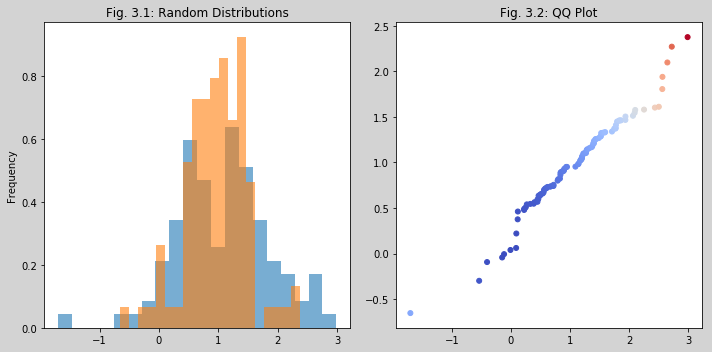

In [20]:
# Let's create a normal random distribution that we can compare to beta

pop1 = np.random.normal(1, 0.8, 10000)
pop2 = np.random.normal(1, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample1.sort()

sample2 = np.random.choice(pop2, 100, replace=True)
sample2.sort()

plt.subplots(nrows=1, ncols=2, figsize=(10, 5), facecolor='lightgrey')

plt.subplot(1,2,1)
plt.hist(sample1, bins=20, density=True, alpha=0.6)
plt.hist(sample2, bins=20, density=True, alpha=0.6)
plt.ylabel('Frequency')
plt.title("Fig. 3.1: Random Distributions")

plt.subplot(1,2,2)
c = sample1**2 + sample2**2
plt.scatter(sample1, sample2, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)
plt.title("Fig. 3.2: QQ Plot")

plt.tight_layout()
plt.show()

Before we analyze beta, we need a normal random distribution to compare it to. In Fig. 3.1 we have a random sampling of two normal distributions in a similar range to beta and in Fig. 3.2 we can confirm with the QQ Plot that distributions are normally distributed. If our beta is normally distributed, then the charts should appear similar. A normally distributed beta means that there are some cryptocurrencies that under-perform, some that outperform, but most are near-correlated to that overall cryptocurrency market.

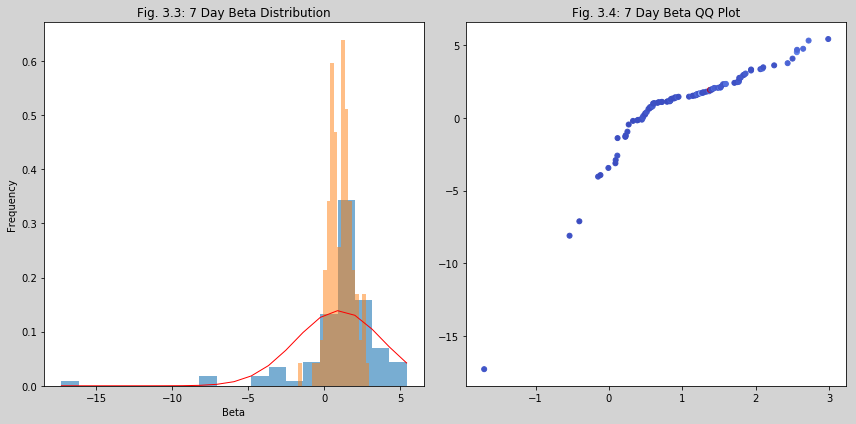

In [21]:
# now let's plot beta and compare it to the normal distribution

plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='lightgrey')

plt.subplot(1,2,1)
xy = beta_df['beta_24h']
mu, sigma = xy.mean(), xy.std()

count, bins, ignored = plt.hist(xy, 20, density=True, alpha=0.6)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=1, color='r')

plt.hist(sample1, bins=20, density=True, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Beta')
plt.title('Fig. 3.3: 7 Day Beta Distribution')

plt.subplot(1,2,2)
c = sample1**2 + xy**2
plt.scatter(sample1, xy.sort_values(), s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)
plt.title('Fig. 3.4: 7 Day Beta QQ Plot')

plt.tight_layout()
plt.show()

Luckily, the our beta in blue is normally distributed compared to the random normal distribution in orange. The 7 day beta has a mean of 1.0 and, outside of a some outliers, it's clustered in a positive range. Further more, we can confirm from the QQ Plot that the data matches a normal distribution.

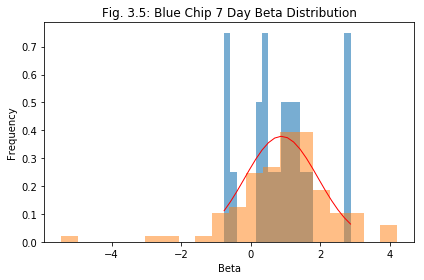

In [22]:
# now let's plot beta and compare it to the normal distribution

xy = beta_df.query('market_cap_usd > 300000000')['beta_7d']
mu, sigma = xy.mean(), xy.std()

count, bins, ignored = plt.hist(xy, 20, density=True, alpha=0.6)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=1, color='r')

plt.hist(beta_df['beta_7d'], bins=20, density=True, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Beta')
plt.title('Fig. 3.5: Blue Chip 7 Day Beta Distribution')

plt.tight_layout()
plt.show()

Finally, a clear representation of the comparative risk of cryptocurrency market. In Fig. 3.5 ee can compare the beta of blue chip cryptocurrencies plotted in blue against the beta of the rest market plotted in orange we can see that the blue chips are more closely clustered around 1 with fewer outliers and a tigher central tendency. What this could mean is that on average, the blue chips have less inherent risk than the overall market. 

We can compare the mean beta of the blue chips: 0.8876316816230979, to the mean beta of the market: 1.0, and the beta of Bitcoin: 0.8122821672379527, the largest cryptocurrency. We can see that the blue chips are approximately 13.6% less risky than the overall market compared to Bitcoin which is approximately 23% less risky than the overall market.

Now that we have clearer view of the risk of the market compared to larger market cap cryptocurrencies and Bitcoin, we can review that data for its significance by conducting a t-test. Our hypothesis is that Bitcoin and other larger market cap cryptocurrencies are less risky than the market as a whole. We have observed that the beta of the market and the beta of our 'blue chip' crytocurrencies are normally distributed, and the blue chip beta is less than the market beta. All this implies our hypothesis to be correct. So let's crunch the numbers and see if we're right.

In [23]:
# let's conduct a t-test to verify our results

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

ttest_blue_chip = ttest_ind(beta_df.query('market_cap_usd > 300000000')['beta_7d'], sample1)
print("Blue Chip 7 Day Beta:" , ttest_blue_chip)

#ttest_market = ttest_ind(beta_df['beta_7d'], sample1)
#print("Market 7 Day Beta:" , ttest_market)

Blue Chip 7 Day Beta: Ttest_indResult(statistic=-0.9394062565794435, pvalue=0.34940926692195473)


The t-test shows that the we fail to reject the null hypothesis.

## Conclusion: What Does This Mean in Terms of Cryptocurrency Risk?

Failing the t-test means we have not proved conclusively that larger market cap cryptocurrencies are less risky than the cryptocurrency market overall. This also implies that the risk of cryptocurrencies is possibly more complex than traditional securities. We saw the cryptocurrency market rebuke serveral common behaviors of traditional securites, such as price being normally distributed (Fig. 1.2), volatility stabilizing over time (Figs. 2.1-2.4), volatility stabilizing as market capitalization increases (Figs. 2.6-2.9 ), and risk decreasing for larger market cap securities (fig. 3.5). Perhaps if cryptocurrencies behaved more like traditional securities, we could more capably model risk using traditional methods, such as beta analysis.

Our risk analysis could have failed for multiple reasons,  foremost our sample size of large cap cryptocurrencies is only 22 compared to our population of 100. It's possible that aren't enough large cap cryptocurrencies to generate a consistent theory on their risk. It's also possible that cryptocurrencies being a new technology and still a relatively small market frought with controversy, traditional measures of risk and volatility fall short in accounting for the complexities of the market. We could draw comparisons to the derivatives market in 2007-2008, which was a relatively new and not completely understood market at the time, that had serious repercusions on markets worldwide. Another possibility is the time frame we're sampling from is skewing the results. Any analysis done on the cryptocurrency market would look different during the 2017 bull market compared to the 2018 bear market. There is also the possibility that a seven day window isn't a large enough time frame to derive any meaningful analysis. Whatever the cause of our risk analysis to fall short, we were at least able to gain some understanding of the cryptocurrency market.

If we want to further our understanding of the risk of crytocurrencies or the market as a whole, we could expand our analysis over larger time periods or multiple time periods. Comparing measures of risk over multiple time periods could give us a more consistent view of the way risk behaves in different scenarious. We could also compare cryptocurrencies to more similar securities markets, such as small, micro, and nano cap securities, and smaller markets that are more prone to big swings like the cryptocurrency market, such as emerging foreign markets.